In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [2]:
columns = [
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang",
    "oldpeak", "slope", "ca", "thal", "target"
]

df = pd.read_csv("processed.cleveland.data",
                 names=columns, na_values="?")

df = df.dropna()

In [3]:
X = df.drop("target", axis=1)

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

df["KMeans_Cluster"] = kmeans_labels

print("KMeans Cluster Counts:")
print(df["KMeans_Cluster"].value_counts())

KMeans Cluster Counts:
KMeans_Cluster
0    184
1    113
Name: count, dtype: int64


In [7]:
agg = AgglomerativeClustering(n_clusters=2)
agg_labels = agg.fit_predict(X_scaled)

df["Hierarchical_Cluster"] = agg_labels

print("\nHierarchical Cluster Counts:")
print(df["Hierarchical_Cluster"].value_counts())


Hierarchical Cluster Counts:
Hierarchical_Cluster
1    168
0    129
Name: count, dtype: int64


In [8]:
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

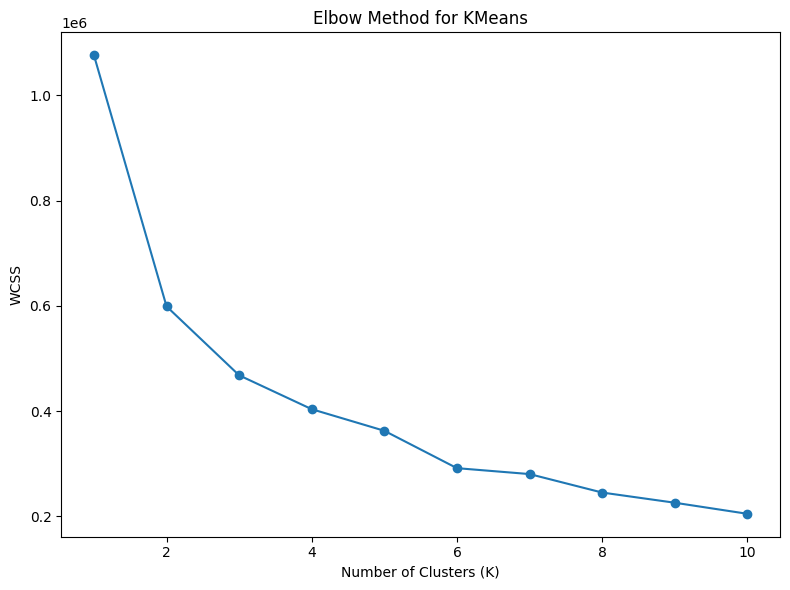

In [9]:
# Elbow plot
plt.figure(figsize=(8, 6))
plt.plot(K_range, wcss, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for KMeans")
plt.tight_layout()
plt.savefig("kmeans_elbow.png")
plt.show()

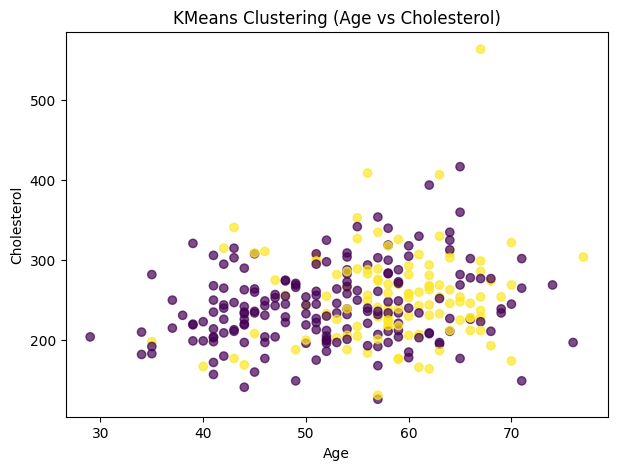

In [10]:
# Plot KMeans Clusters (age vs chol)
plt.figure(figsize=(7,5))
plt.scatter(df["age"], df["chol"], c=df["KMeans_Cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.title("KMeans Clustering (Age vs Cholesterol)")
plt.show()

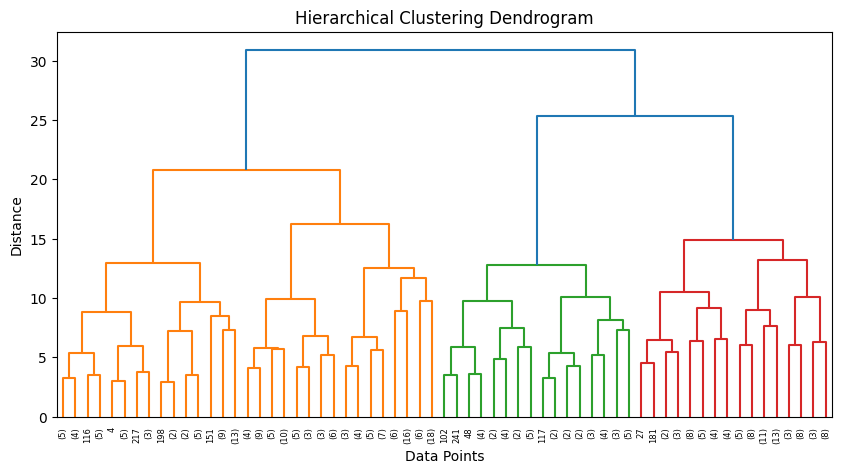

In [11]:
# Dendrogram for Hierarchical Clustering
plt.figure(figsize=(10, 5))
linked = linkage(X_scaled, method="ward")
dendrogram(linked, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()